# Voting

Voting is the general concept of arriving to the final answer through majority voting or averaging. 

For example, suppose we have an three classifiers each of which have a relative performance of about 80% accuracy: 1) SVM, 2) Decision Tree, and 4) K-Nearest Neighbor Classifier. One simple method of created an even better classifier is to aggregate on the predictions on each classifier and form a final prediction of the majority voted classifier.

Votes can also have associated weights in order to help quantify the wieght based on some metric or heiristic.

## Example

Lets explore the classification performance of toy dataset, `make_moons`.

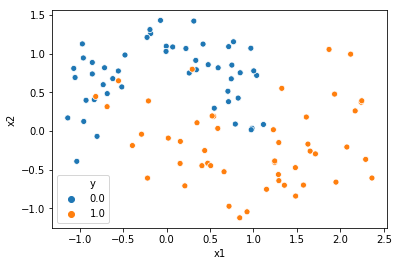

In [10]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


X, y = make_moons(noise=.3)
df = pd.DataFrame(np.hstack((X, y.reshape((-1, 1)))), columns=['x1', 'x2', 'y'])
ax = sns.scatterplot(x="x1", y="x2", hue="y", data=df)

Lets compare the performance of all the classifiers. Note that a logistic regressor is techniqually a classifier due to its logistic curve.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_clf = LogisticRegression(solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(gamma='scale')

individual_estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
voting_clf = VotingClassifier(individual_estimators, voting='hard')
all_estimators = individual_estimators + [('vote', voting_clf)]

for name, classifier in all_estimators:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))

lr 0.8181818181818182
rf 0.9090909090909091
svc 0.9090909090909091
vote 0.9090909090909091


## Types of Voting

**Hard Voting**: With hard voting, each vote is treated as being equivalent. In this way, a "hard" majority vote determines the final prediction for a model ensemble.

**Soft Voting**: If all the models within your ensemble contain a probability mode (`predict_proba()`) method, then a soft vote option is available. Soft voting considers the certainity of a classifer, as oppose to have a hard binary vote. In this sense, soft voting tends to outperform a hard voting model enemble.

To understand the difference, consider the following example:

Suppose you have probabilities: `0.45, 0.45, 0.90`

While a hard voting would give you a score of 1/3 (1 vote in favour and 2 against), as classify as "negative", a soft voting would give you the average of the probabilities, which is 0.6, and would be a "positive".
